# SNS injection painting

In [40]:
import sys
import importlib
import os
from os.path import join

import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from tqdm import tqdm
from tqdm import trange
import proplot as pplt 
import seaborn as sns

sys.path.append('..')
from tools import animation as myanim
from tools import beam_analysis as ba
from tools import plotting as myplt
from tools import utils

## Settings

In [41]:
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['axes.grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'mono_r'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['grid.alpha'] = 0.04
plt.rcParams['savefig.dpi'] = 'figure'
lineplot_kws = dict(marker=None, legend=False)
format_kws = dict(ygrid=True, xgrid=False)
savefig_kws = dict(dpi=300)

In [42]:
folder = '_output/data/'
location = 'injection point' # {'injection point', 'rtbt entrance'}

In [43]:
utils.delete_files_not_folders('_output/figures/')

## Injection region closed orbit

In [44]:
inj_region_coords_t0 = np.load(join(folder, 'inj_region_coords_t0.npy'))
inj_region_coords_t1 = np.load(join(folder, 'inj_region_coords_t1.npy'))
inj_region_positions_t0 = np.load(join(folder, 'inj_region_positions_t0.npy'))
inj_region_positions_t1 = np.load(join(folder, 'inj_region_positions_t1.npy'))
inj_region_coords_t0 *= 1000. # convert to mm-mrad
inj_region_coords_t1 *= 1000. # convert to mm-mrad

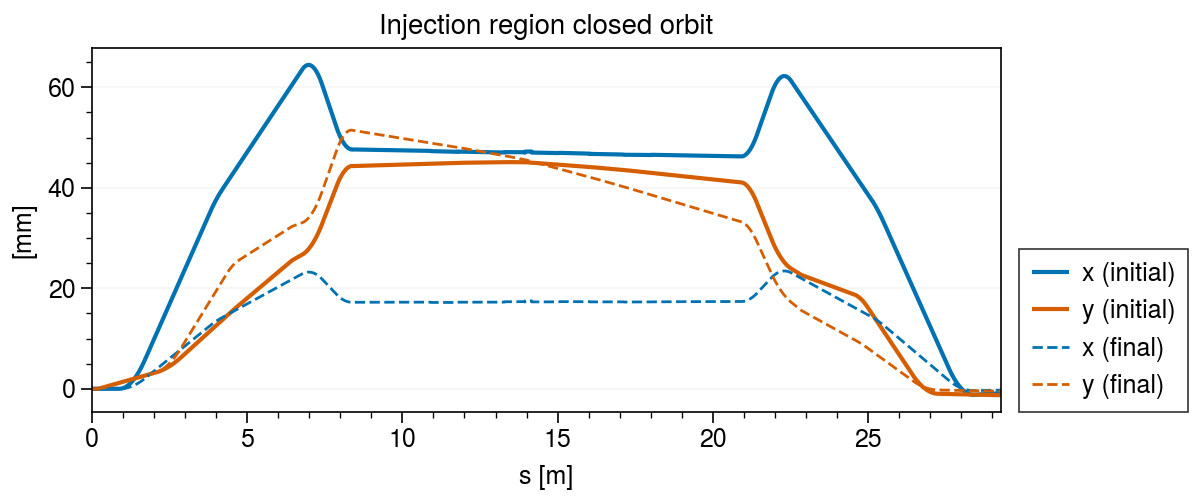

In [45]:
fig, ax = pplt.subplots(figsize=(6, 2.5))
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 0], label='x (initial)')
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 2], label='y (initial)')
ax.format(cycle='colorblind')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 0], ls='--', lw=1, label='x (final)')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 2], ls='--', lw=1, label='y (final)')
ax.format(title='Injection region closed orbit')
ax.legend(ncols=1, loc=(1.02, 0), handlelength=1.5);
ax.format(xlabel='s [m]', ylabel='[mm]', **format_kws) 
plt.savefig('_output/figures/inj_region_closed_orbit.png', **savefig_kws)

## Kicker strengths

In [7]:
# def get_perveance(kin_energy, mass, line_density):
#     classical_proton_radius = 1.53469e-18 # m
#     gamma = 1 + (kin_energy / mass) # Lorentz factor
#     beta = np.sqrt(1 - (1 / gamma)**2) # velocity/speed_of_light
#     return (2 * classical_proton_radius * line_density) / (beta**2 * gamma**3)

# ring_length = 248.0
# zlim = (135.0 / 360.0) * ring_length
# zmin, zmax = -zlim, zlim
# bunch_length = zmax - zmin

# # Production beam
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# intensity = 1.5e14
# Q = get_perveance(kin_energy, mass, intensity / bunch_length)
# xmax = ymax = 26.0
# area = xmax * ymax
# print('Q = {}'.format(Q))
# density_production = Q / area
# print('Q / area = {}'.format(density_production))

# # SCBD
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# max_intensity = 1.5e14
# max_n_turns = 1000.
# xmax = ymax = 26.0
# area = xmax * ymax
# densities = []
# turns = np.linspace(1, max_n_turns, 1000)
# for t in turns:
#     tau = t / max_n_turns
#     intensity = max_intensity * tau
#     Q = get_perveance(kin_energy, mass, intensity / bunch_length)
#     densities.append(Q / area)
# densities = np.array(densities)
    
# fig, ax = pplt.subplots()
# ax.plot(turns, densities, color='black');
# ymin, ymax = ax.get_ylim()
# alpha = 0.15
# ax.fill_between(turns, 0., density_production, color='green', alpha=alpha)
# ax.fill_between(turns, density_production, ymax, color='red', alpha=alpha)
# ax.format(grid=True, ylim=(0, ax.get_ylim()[1]),
#           xlabel='# turns to reach full beam size', ylabel=r'Q / area [mm$^{-2}$]')
# plt.savefig('_output/figures/perveance_scaling_{}_{}.png'.format(kin_energy, xmax))

In [46]:
kicker_angles_t0 = np.loadtxt(folder + 'kicker_angles_t0.dat')
kicker_angles_t1 = np.loadtxt(folder + 'kicker_angles_t1.dat')
kicker_names = ['ikickh_a10', 'ikickv_a10', 'ikickh_a11', 'ikickv_a11',
                'ikickv_a12', 'ikickh_a12', 'ikickv_a13', 'ikickh_a13']

In [47]:
def waveform(t, k0, k1):
    return k0 - (k0 - k1)*np.sqrt(t)

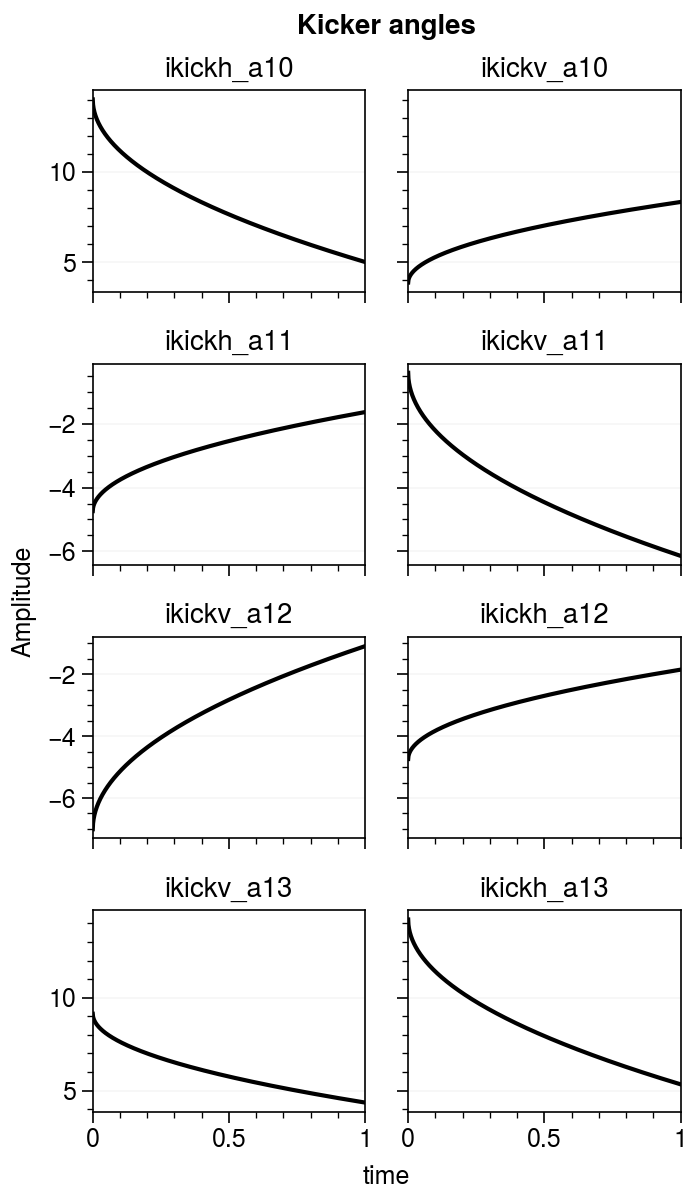

In [48]:
t = np.linspace(0, 1, 1000)

fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, 1000 * waveform(t, k0, k1), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker angles', xlabel='time', **format_kws)
plt.savefig('_output/figures/kicker_angles.png', **savefig_kws)

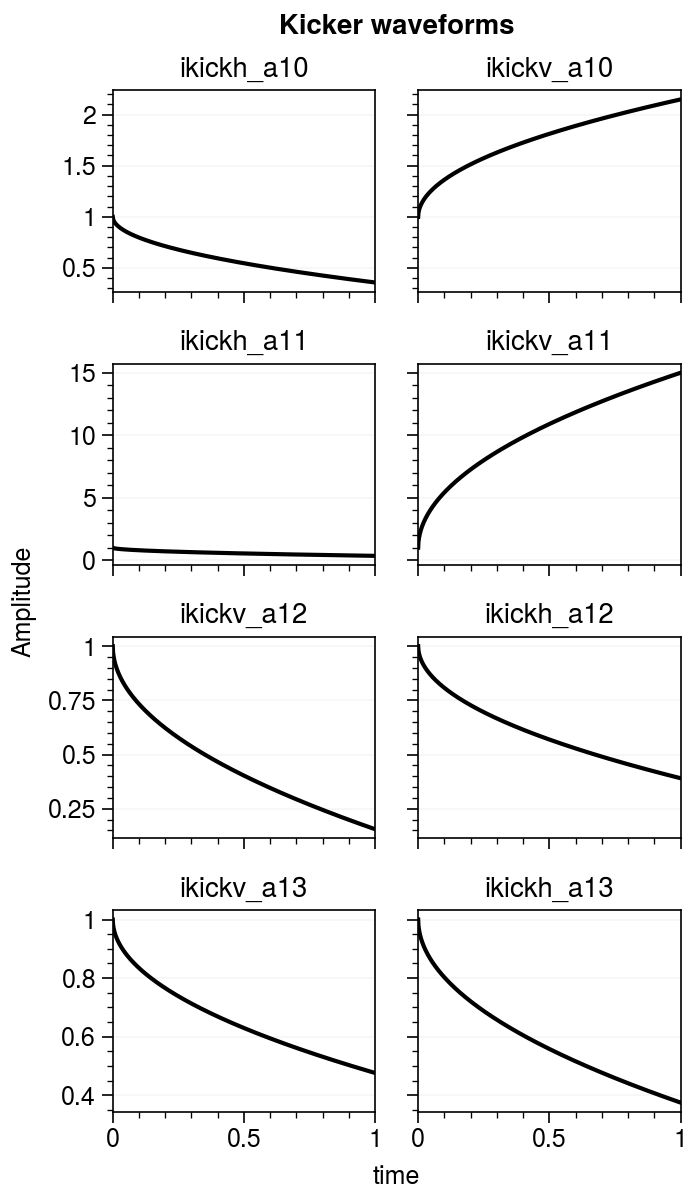

In [49]:
fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, waveform(t, 1.0, k1/k0), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker waveforms', xlabel='time', **format_kws)
plt.savefig('_output/figures/kicker_waveforms.png', **savefig_kws)

## Beam statistics

In [50]:
if location == 'rtbt entrance':
    suffix = 'rtbt'
elif location == 'injection point':
    suffix = 'inj'
else:
    raise ValueError('Invalid location.')
    
turns = np.loadtxt(join(folder, 'turns_stored_{}.dat'.format(suffix)))
turns = turns.astype(int)
print(turns)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398 400]


In [13]:
coords = utils.load_stacked_arrays(join(folder, 'coords_{}.npz'.format(suffix)))
for i in trange(len(coords)):
    coords[i][:, 5] *= 1000. # convert dE to [MeV]

100%|██████████| 201/201 [00:00<00:00, 487.61it/s]


In [14]:
moments_list = []
for X in tqdm(coords):
    Sigma = np.cov(X[:, :4].T)
    moments_list.append(ba.mat2vec(Sigma))
moments_list = np.array(moments_list)
    
stats = ba.StatsReader()
stats.read_moments(moments_list)

100%|██████████| 201/201 [00:02<00:00, 77.21it/s] 


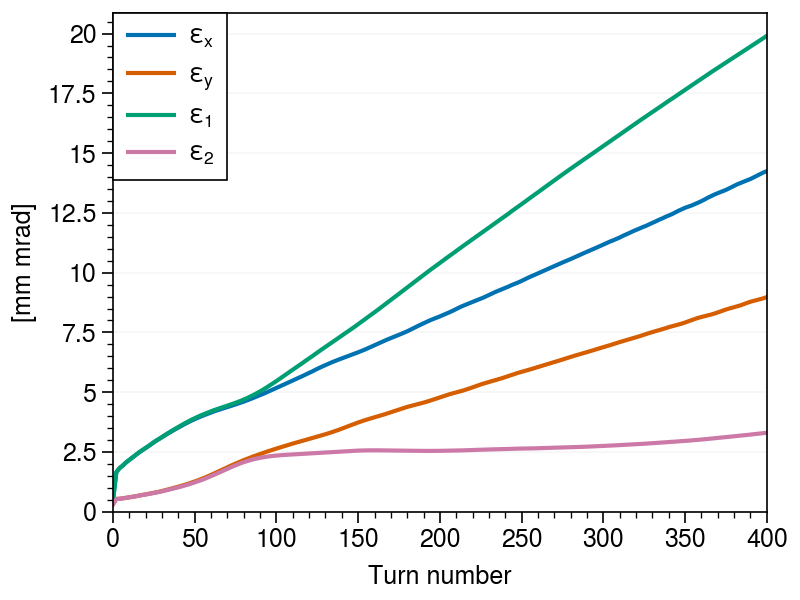

In [58]:
fig, ax = pplt.subplots(figsize=(4, 3.0))
g1 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_x'], **lineplot_kws)
g2 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_y'], **lineplot_kws)
g3 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_1'], **lineplot_kws)
g4 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_2'], **lineplot_kws)
ax.legend([g1, g2, g3, g4], labels=[r'$\varepsilon_{}$'.format(v) for v in ['x', 'y', '1', '2']], 
          ncols=1, loc='upper left', framealpha=1.0)
ax.format(ylabel='[mm mrad]', xlabel='Turn number', ylim=(0., ax.get_ylim()[1]), **format_kws);
plt.savefig('_output/figures/emittances.png', **savefig_kws)

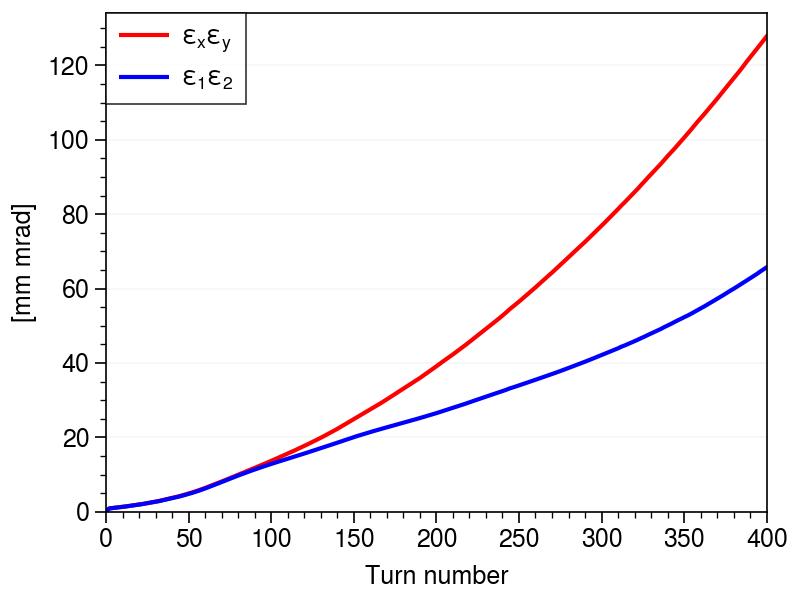

In [202]:
fig, ax = pplt.subplots(figsize=(4, 3.0))
g1 = ax.plot(turns, (stats.twiss2D['eps_x'] * stats.twiss2D['eps_y']), color='red', **lineplot_kws)
g2 = ax.plot(turns, (stats.twiss4D['eps_1'] * stats.twiss4D['eps_2']), color='blue', **lineplot_kws)
ax.legend([g1, g2], labels=[r'$\varepsilon_x\varepsilon_y$', r'$\varepsilon_1\varepsilon_2$'],
          ncols=1, loc='upper left')
ax.format(ylabel='[mm mrad]', xlabel='Turn number', ylim=(0., ax.get_ylim()[1]), **format_kws);
plt.savefig('_output/figures/emittances4D.png', **savefig_kws)

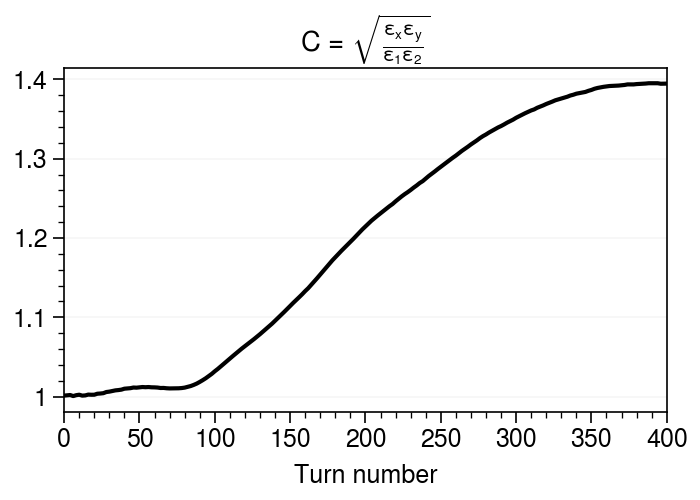

In [201]:
fig, ax = pplt.subplots(figsize=(3.5, 2.5))
C = np.sqrt((stats.twiss2D['eps_x'] * stats.twiss2D['eps_y']) / (stats.twiss4D['eps_1'] * stats.twiss4D['eps_2']))
ax.plot(turns, C, c='black', **lineplot_kws)
ax.format(xlabel='Turn number', 
          title=r'C = $\sqrt{\frac{\varepsilon_x\varepsilon_y}{\varepsilon_1\varepsilon_2}}$', 
          **format_kws)
plt.savefig('_output/figures/coupling_factor.png', **savefig_kws)

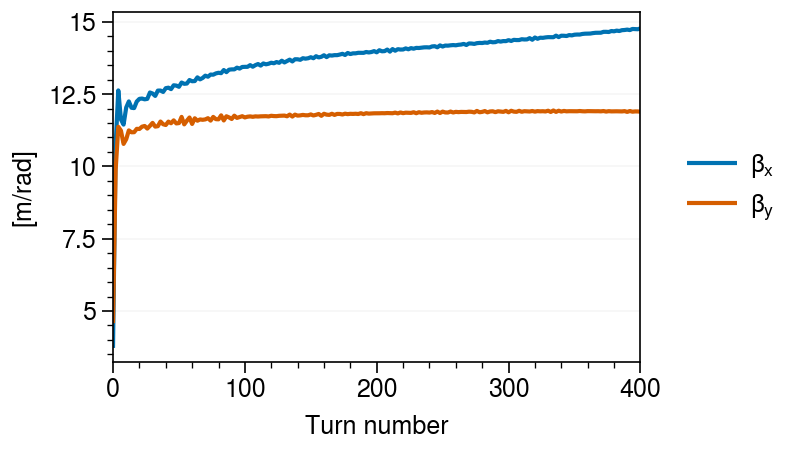

In [65]:
fig, ax = pplt.subplots(figsize=(4.0, 2.25))
h1 = ax.plot(turns, stats.twiss2D['beta_x'])
h2 = ax.plot(turns, stats.twiss2D['beta_y'])
legend_kws = dict(loc='right', ncol=1, framealpha=0.)
ax.legend(handles=[h1, h2], labels=[r'$\beta_x$', r'$\beta_y$'], **legend_kws)
ax.format(xlabel='Turn number', ylabel='[m/rad]', **format_kws)
plt.savefig('_output/figures/beta.png', **savefig_kws)

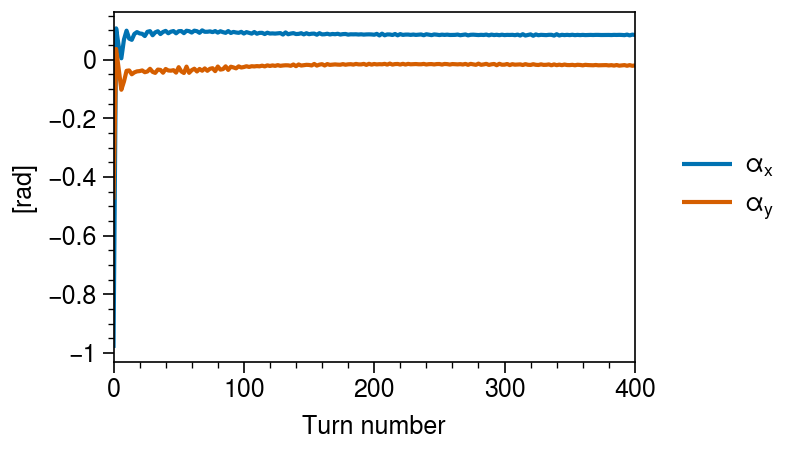

In [66]:
fig, ax = pplt.subplots(figsize=(4.0, 2.25))
h1 = ax.plot(turns, stats.twiss2D['alpha_x'])
h2 = ax.plot(turns, stats.twiss2D['alpha_y'])
legend_kws = dict(loc='right', ncol=1, framealpha=0.)
ax.legend(handles=[h1, h2], labels=[r'$\alpha_x$', r'$\alpha_y$'], **legend_kws)
ax.format(xlabel='Turn number', ylabel='[rad]')
plt.savefig('_output/figures/alpha.png', **savefig_kws)

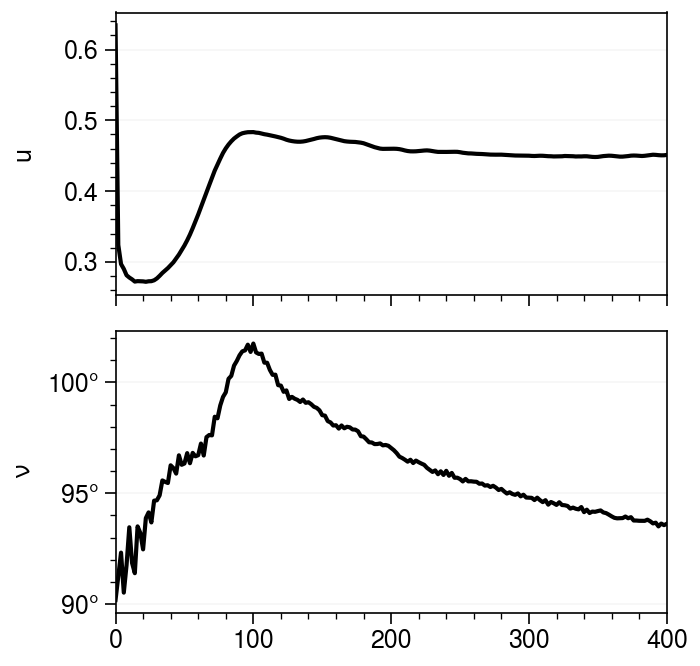

In [68]:
fig, axes = pplt.subplots(nrows=2, figsize=(3.5, 3.33), spany=False, aligny=True)
axes[0].plot(turns, stats.twiss4D['u'], color='black', **lineplot_kws)
axes[1].plot(turns, stats.twiss4D['nu'], color='black', **lineplot_kws)
axes[0].format(ylabel='u')
axes[1].format(ylabel=r'$\nu$', yformatter='deg')
axes.format(**format_kws)
plt.savefig('_output/figures/u_and_nu.png', **savefig_kws)

## Tunes 

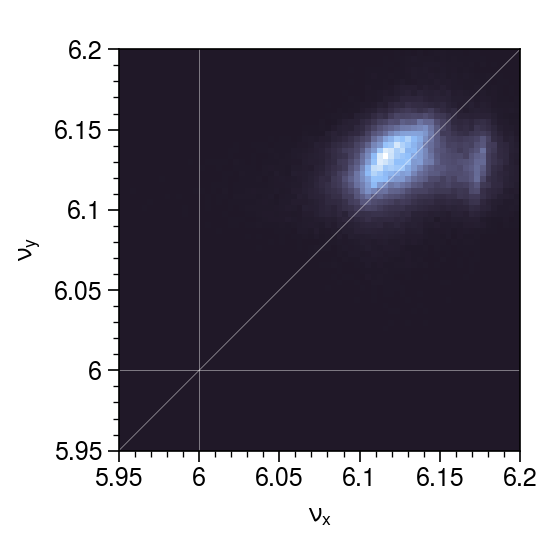

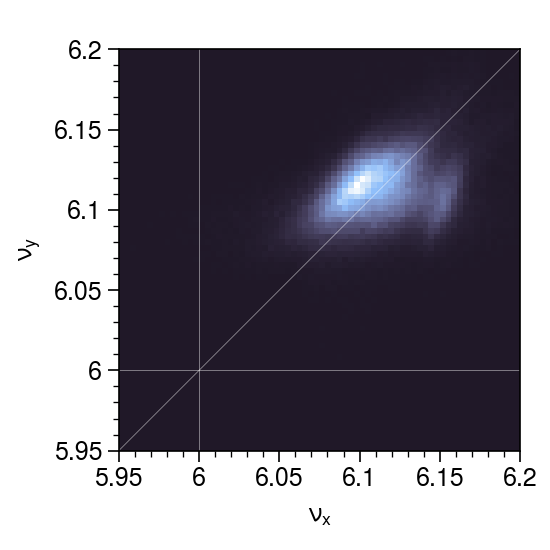

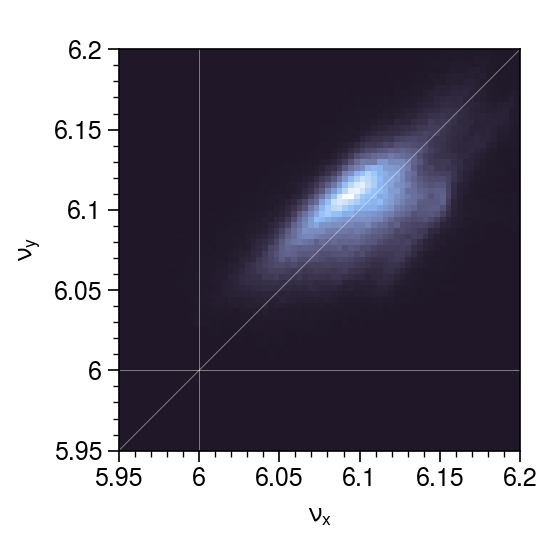

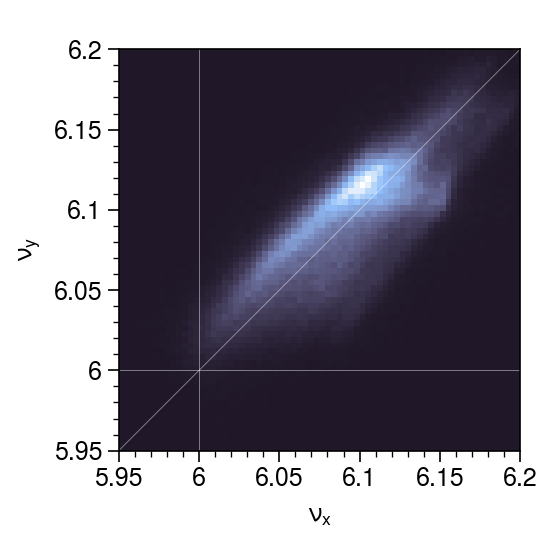

In [75]:
filenames = [
    'bunch_turn=100.dat',
    'bunch_turn=200.dat',
    'bunch_turn=300.dat', 
    'bunch_turn=400.dat'
]
for filename in filenames:
    df = ba.load_pybunch(os.path.join(folder, filename))
    
    numin, numax = 5.95, 6.20
    nu_limits = (numin, numax)
    
    fig, ax = pplt.subplots(figsize=(2.75, 2.75))
    nux = df['nux'].values
    nuy = df['nuy'].values
    nux[np.where(nux > 0.5)] -= 1.0
    nuy[np.where(nuy > 0.5)] -= 1.0
    nux += 6.0
    nuy += 6.0
    ax.hist2d(nux, nuy, bins=70, range=(nu_limits, nu_limits), cmap='dusk_r', discrete=False, colorbar=False)
    line_kws = dict(color='white', lw=0.3, alpha=0.5)
    ax.axvline(6.0, **line_kws)
    ax.axhline(6.0, **line_kws)
    ax.plot(ax.get_xlim(), ax.get_xlim(), **line_kws)
    ax.format(xlabel=r'$\nu_x$', ylabel=r'$\nu_y$', aspect=1.0)
    
    plt.savefig('_output/figures/tunes_{}.png'.format(filename), **savefig_kws)
    plt.show()

## TBT coordinates 

In [186]:
foil_pos = (48.6, 46.0)
coords_foil_frame = []
for X in tqdm(coords):
    Y = np.copy(X)
    Y[:, 0] -= foil_pos[0]
    Y[:, 2] -= foil_pos[1]
    coords_foil_frame.append(Y)

100%|██████████| 201/201 [00:01<00:00, 126.52it/s]


In [187]:
frame = -1
diag_kws = dict(
    histtype='step',
    bins='auto',
)
plot_kws = dict(
    bins='auto', 
    cmap='mono', 
    sigma=3.25, 
    hist_height_frac=0.6, 
    blur=0.,
    thresh=0,
)

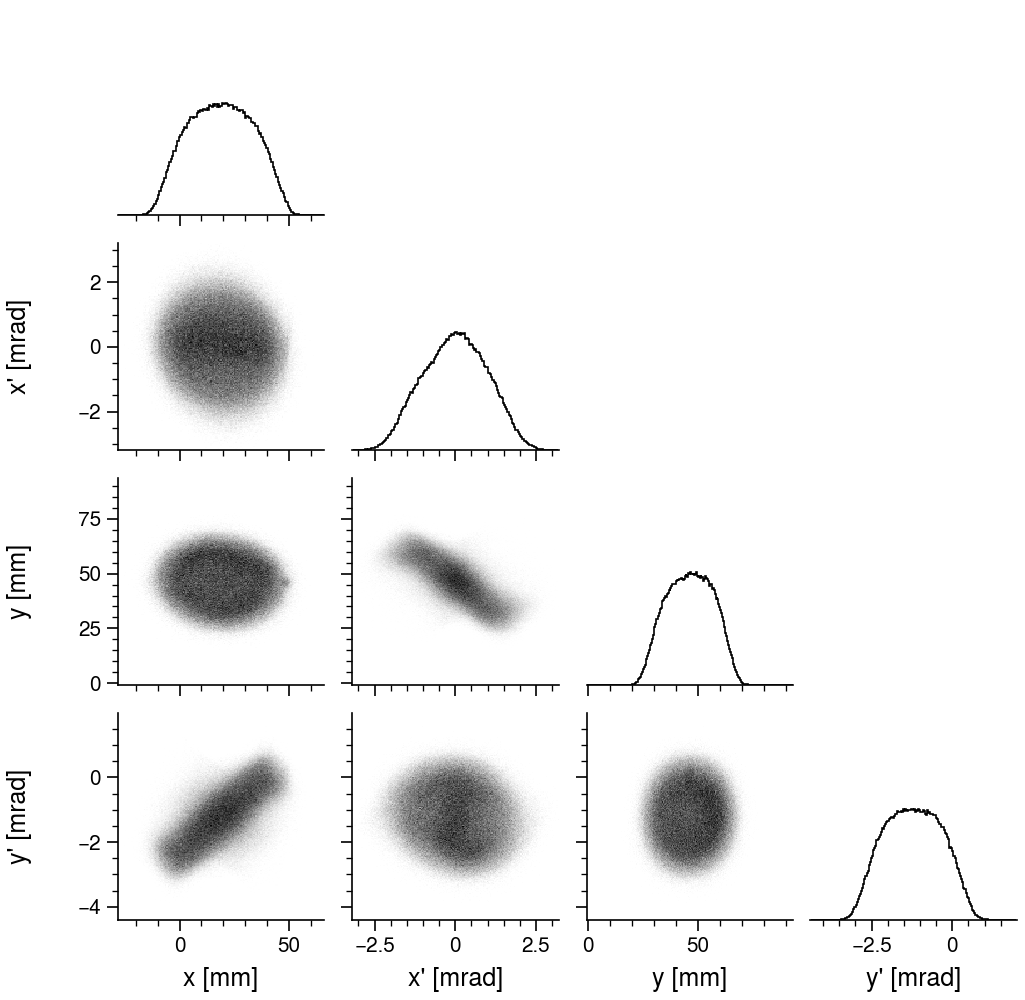

In [188]:
axes = myplt.corner(coords[frame][:, :4], diag_kws=diag_kws, **plot_kws)
limits = [ax.get_xlim() for ax in axes[-1, :]]
plt.savefig('_output/figures/corner4D_turn{}.png'.format(turns[frame]), **savefig_kws)

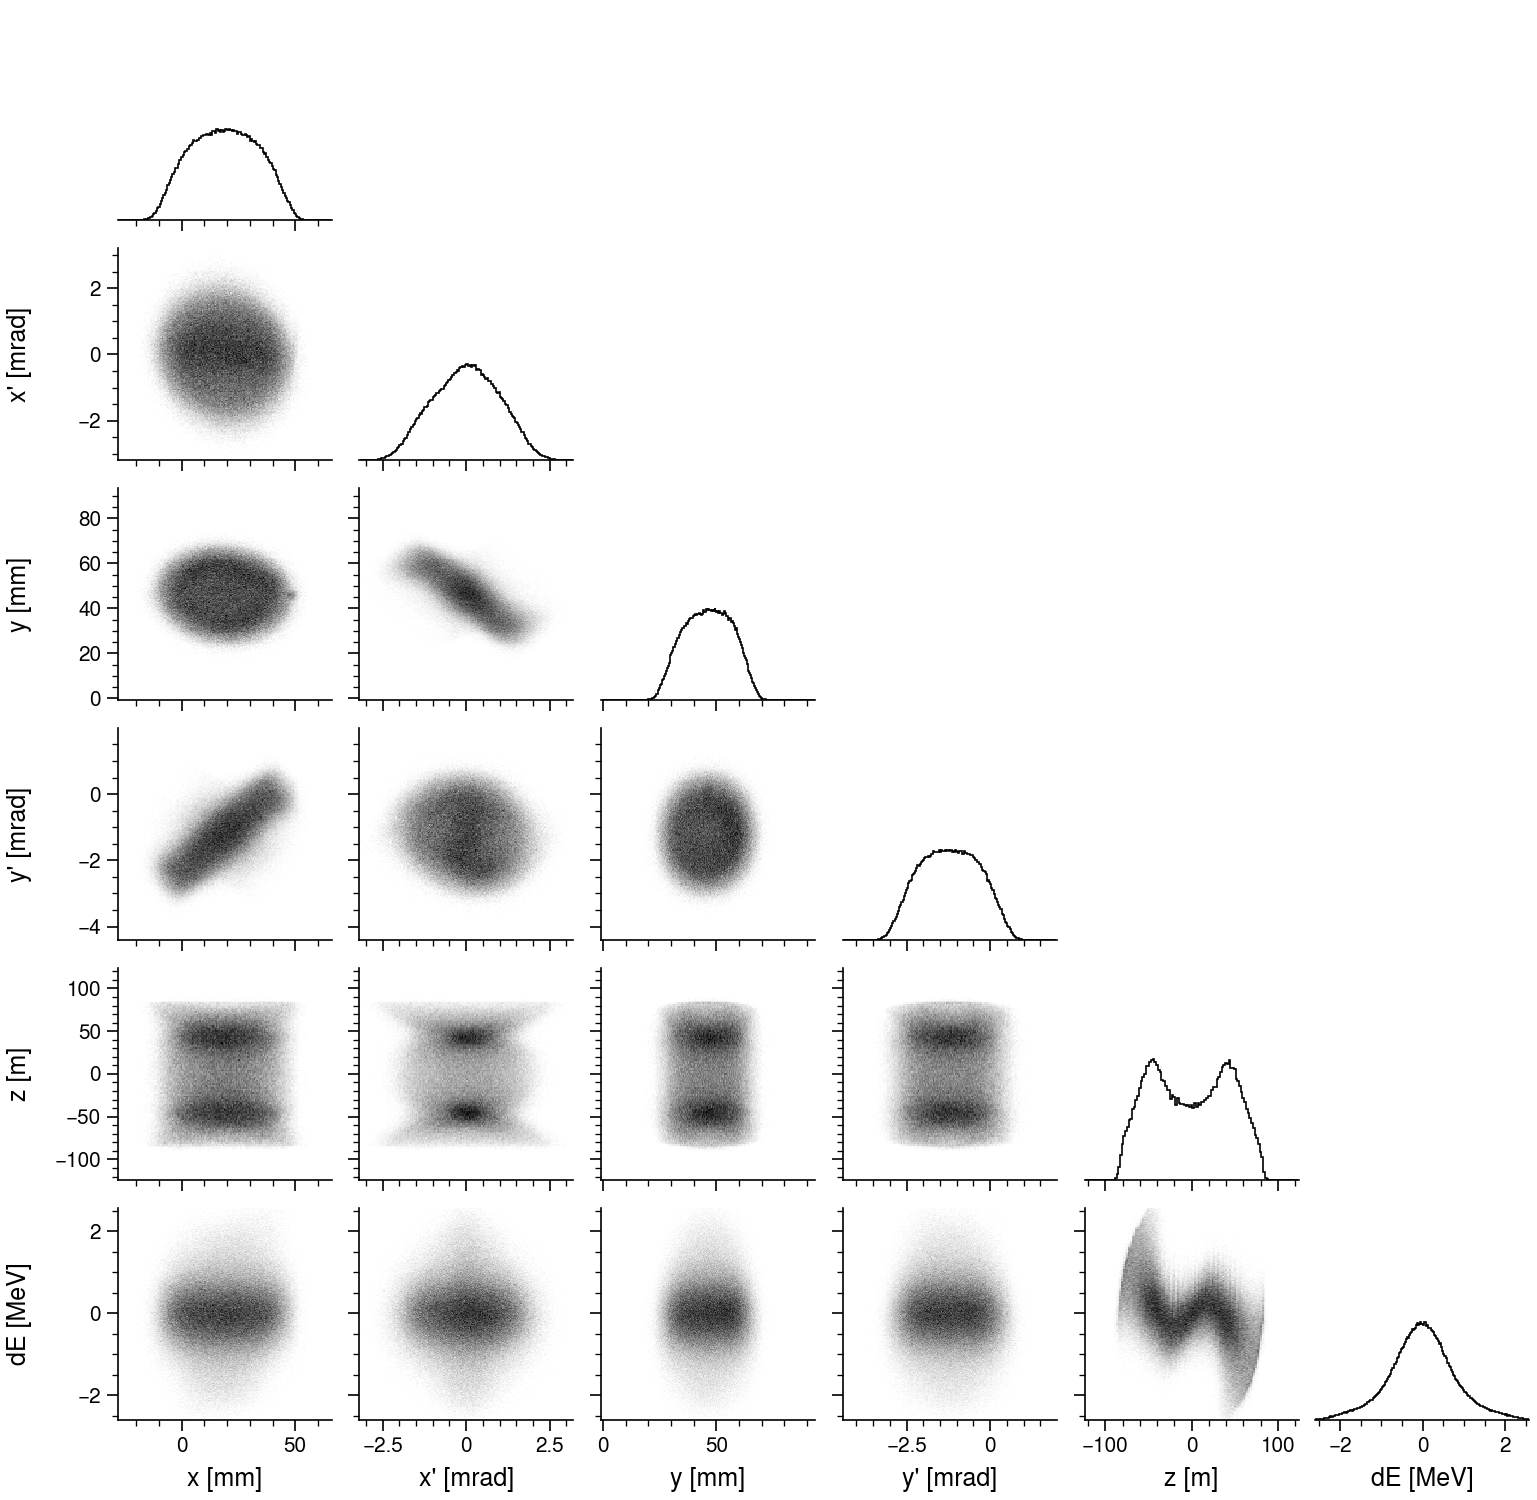

In [189]:
axes = myplt.corner(coords[frame], **plot_kws)
plt.close()
limits = [ax.get_xlim() for ax in axes[-1, :]]
limits[4] = (-248/2, 248/2)
axes = myplt.corner(coords[frame], limits=limits, **plot_kws)
plt.savefig('_output/figures/corner6D_turn{}.png'.format(turns[frame]), **savefig_kws)

In [190]:
n_bins = 150
projections = np.zeros((len(coords), 6, n_bins))
centers = np.zeros((6, n_bins))
for frame, X in enumerate(tqdm(coords)):
    for axis in range(6):
        projections[frame, axis, :], edges = np.histogram(X[:, axis], n_bins, limits[axis], density=False)
        centers[axis, :] = 0.5 * (edges[:-1] + edges[1:])

100%|██████████| 201/201 [00:04<00:00, 43.13it/s]


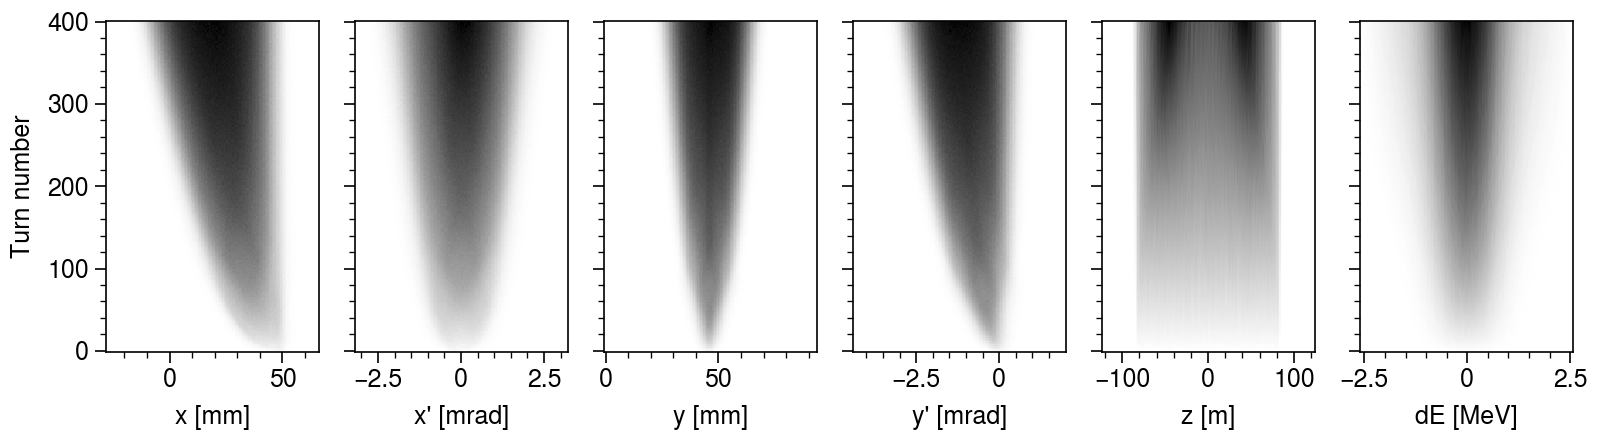

In [191]:
fig, axes = pplt.subplots(ncols=6, figsize=(8.0, 2.2), spanx=False, alignx=True)
vmax = None
xlabels = ["x [mm]", "x' [mrad]", "y [mm]", "y' [mrad]", "z [m]", "dE [MeV]"]
for i, ax in enumerate(axes):
    ax.pcolormesh(centers[i], turns, projections[:, i], cmap='mono', vmax=vmax)
    ax.set_xlabel(xlabels[i])
axes.format(ylabel='Turn number')
plt.savefig('_output/figures/1Dproj.png', **savefig_kws)

In [192]:
anim_kws = dict(
    skip=19, 
    global_cmap_norm=False, 
    static_n_bins='final',
    keep_last=True,
    text_fmt='Turn = {}', 
    text_vals=turns,
    limits=limits, 
    bins=plot_kws['bins'],
    hist_height_frac=plot_kws['hist_height_frac'],
    cmap=plot_kws['cmap'],
    blur=plot_kws['blur'],
)
fps = 3

In [193]:
# fig, axes = pplt.subplots(ncols=3, nrows=3, figsize=(5, 5), spanx=False, spany=False)

# for j in range(3):
#     for i in range(j):
#         axes[i, j].axis('off')
# myplt.despine(axes, ('top', 'right'))
# plot_kws = dict(lw=0, marker='.', ms=1, color='steelblue', markeredgecolor='none')
# lines = [[], [], []]
# for i in range(3):
#     for j in range(i + 1):
#         line, = axes[i, j].plot([], [], **plot_kws)
#         lines[i].append(line)
        
#         axes[i, j].format(xlim=limits[j], ylim=limits[i + 1])
#         kws = dict(color='black', alpha=0.1, lw=0.5, zorder=0)
#         axes[i, j].axvline(0.0, **kws)
#         axes[i, j].axhline(0.0, **kws)
# # plt.close()

# def update(turn):
#     turn *= 10
#     X = coords_foil_frame[turn]
#     for i in range(3):
#         for j in range(i + 1):
#             lines[i][j].set_data(X[:, j], X[:, i + 1])
#     for text in axes[0, 1].texts:
#         text.set_visible(False)
#     axes[0, 1].annotate('Turn = {}'.format(turn), xy=(0.4, 0.5), xycoords='axes fraction')
    
# #     for ax in axes:
# #         for patch in ax.patches:
# #             patch.set_visible(False)
#     Sigma = np.cov(X.T)
#     centers = np.mean(X, axis=0)
#     myplt.rms_ellipses(4 * Sigma, centers=centers, axes=axes, color='black', zorder=99)

# anim = animation.FuncAnimation(fig, update, frames=30)
# anim.save('_output/figures/cornertest.mp4', dpi=350)

In [194]:
importlib.reload(myanim);
anim = myanim.corner(coords, dims=4, kind='hist', **anim_kws)
anim.save('_output/figures/corner4D.mp4', dpi=350, fps=fps)

100%|██████████| 12/12 [00:06<00:00,  1.84it/s]


In [195]:
anim = myanim.corner(coords, dims=6, **anim_kws)
anim.save('_output/figures/corner6D.mp4', dpi=350, fps=fps)

100%|██████████| 12/12 [00:14<00:00,  1.19s/it]


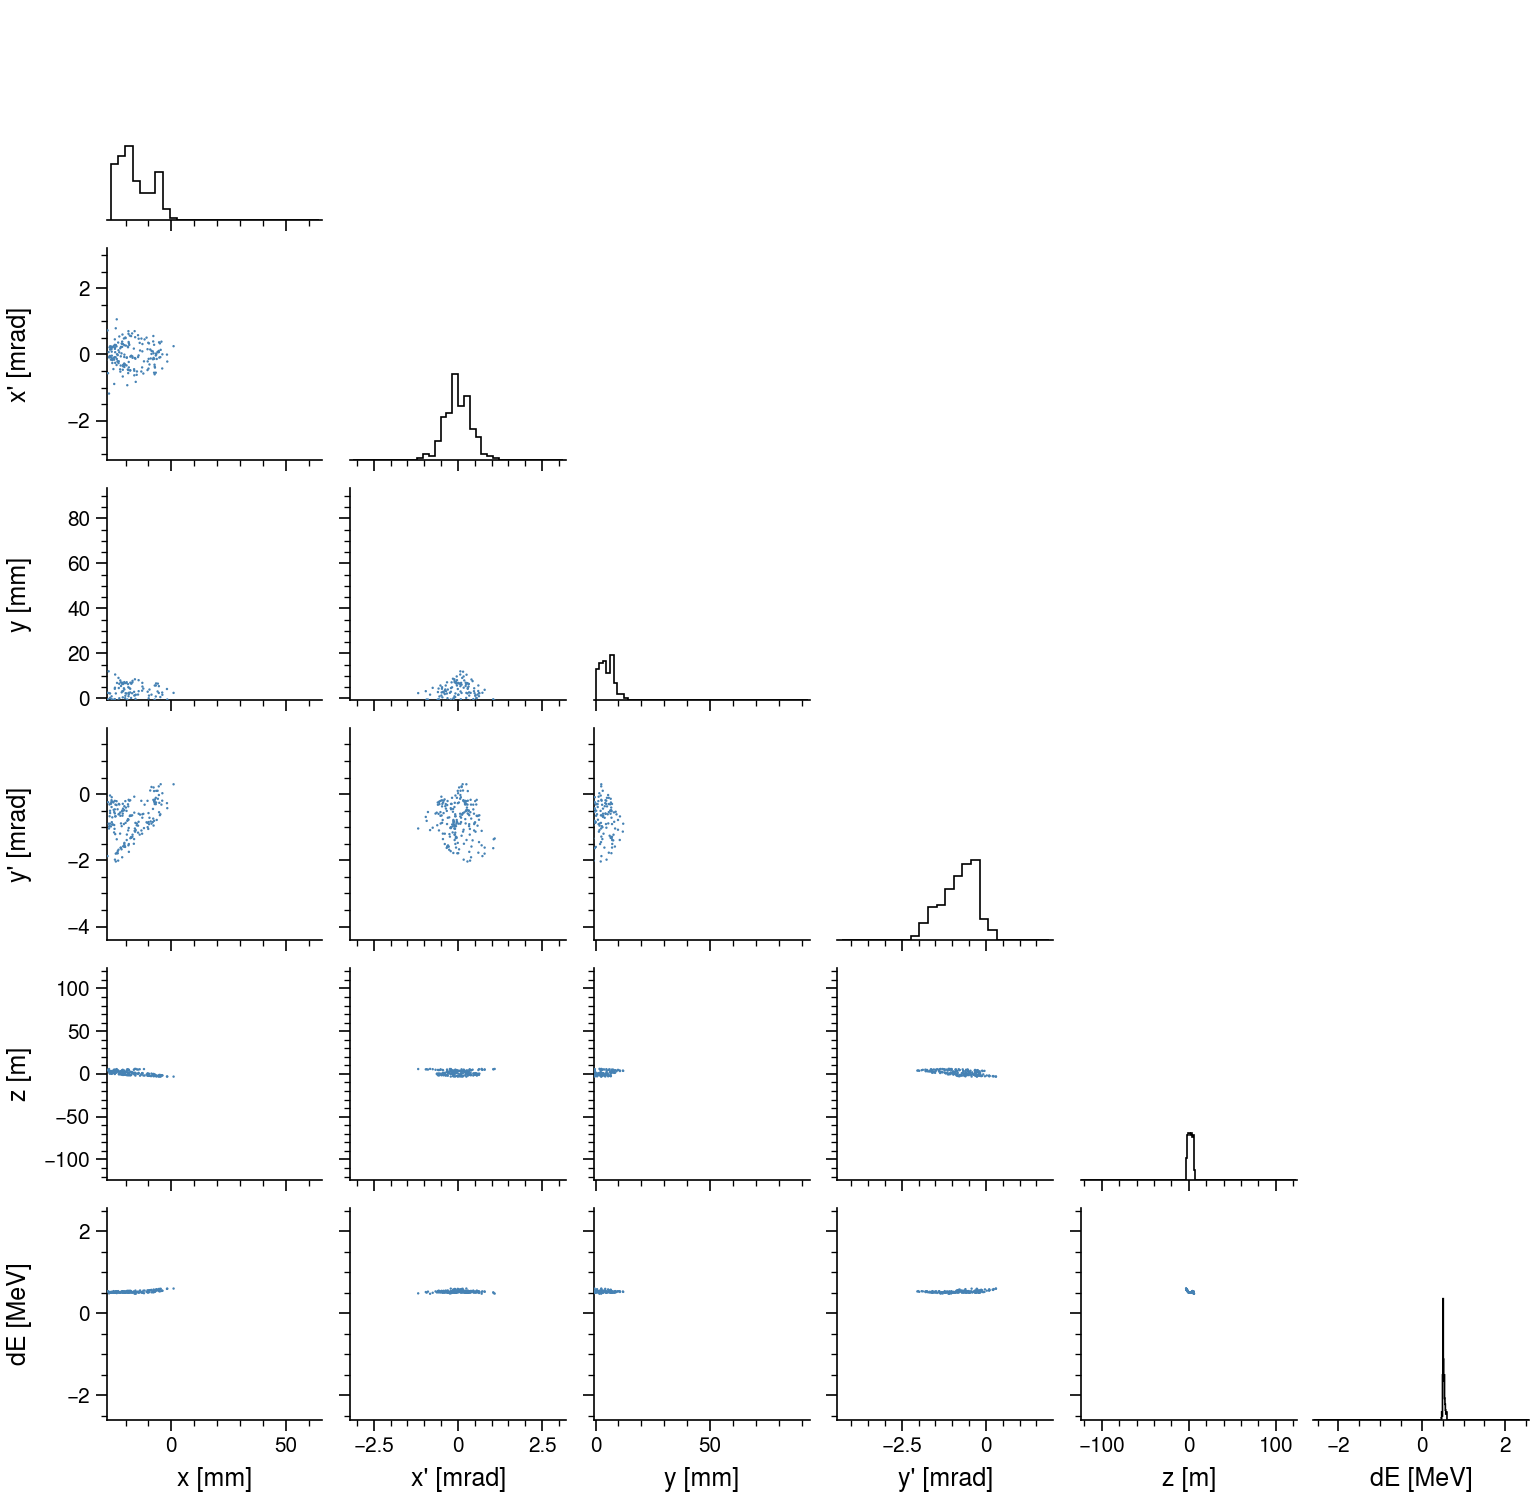

In [196]:
i = 0
X_onepart = np.array([X[i, :] for X in coords_foil_frame])

axes = myplt.corner(X_onepart, kind='scatter', c='steelblue', limits=limits)
plt.savefig('_output/figures/corner_part{}.png'.format(i), **savefig_kws)

In [36]:
# anim = myanim.corner_onepart(
#     X_onepart[:50], show_history=True, skip=0, pad=0.35, text_fmt='Turn = {}', 
#     zero_center=False, history_kws=dict(ms=5, color='lightgrey'),
# )
# anim.save('_output/figures/corner_part{}.mp4'.format(i), dpi=350, fps=5)